In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

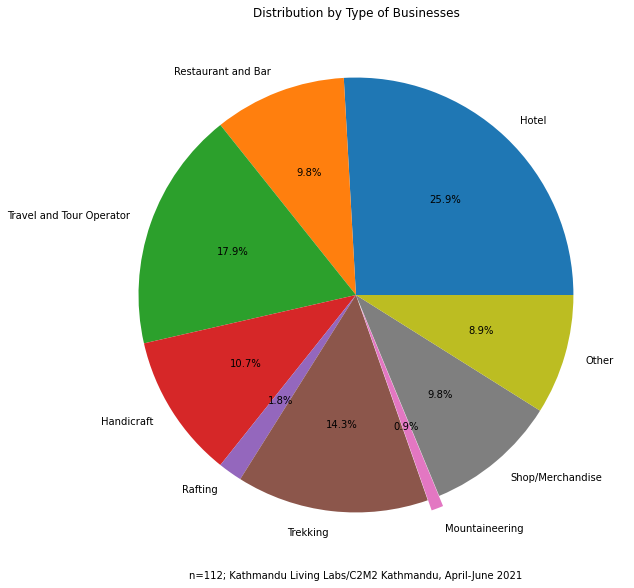

In [100]:

data = pd.DataFrame({'type':['Hotel', 'Restaurant and Bar', 'Travel and Tour Operator', 'Handicraft', 'Rafting', 'Trekking', 
'Mountaineering', 'Shop/Merchandise', 'Other'], 'counts':[29, 11, 20, 12, 2, 16,1, 11, 10]})
plt.figure(figsize=(15,10))
data.set_index('type')['counts'].plot.pie(autopct="%.1f%%", explode=[0,0,0,0,0,0,0.05,0,0])
plt.ylabel('')
plt.xlabel('n=112; Kathmandu Living Labs/C2M2 Kathmandu, April-June 2021')
plt.title('Distribution by Type of Businesses')
plt.savefig('Business_type_pie.jpeg')


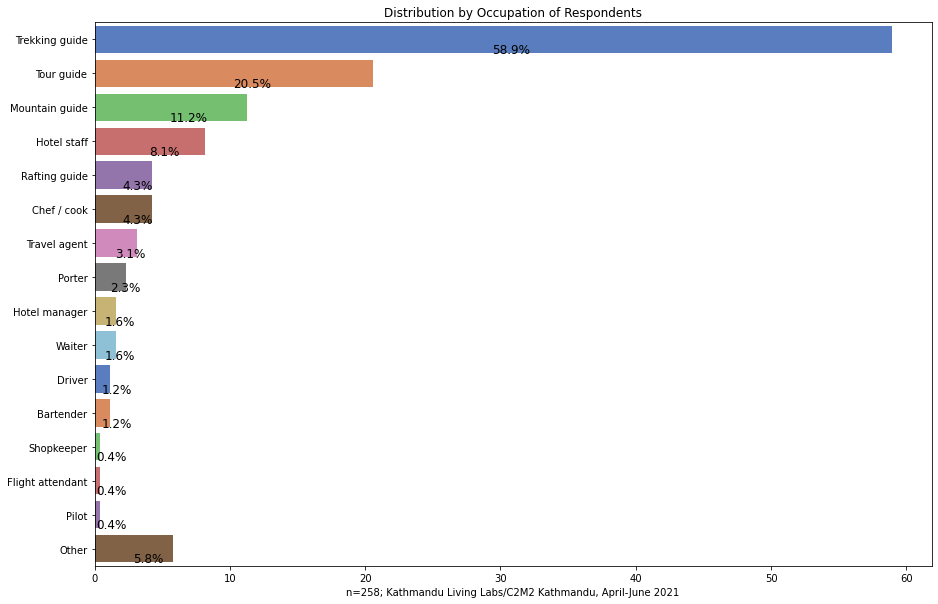

In [137]:

data = pd.DataFrame({'Occupation':['Shopkeeper', 'Tour guide', 'Trekking guide', 'Rafting guide', 'Mountain guide', 'Driver', 'Travel agent', 
'Flight attendant', 'Pilot', 'Chef / cook', 'Hotel manager', 'Hotel staff', 'Waiter', 'Bartender', 'Porter', 
'Other'], 'counts':[1, 53, 152, 11, 29, 3, 8, 1, 1, 11, 4, 21, 4, 3, 6, 15]})
data = data.sort_values('counts', ascending=False)
data['index'] = range(len(data))
data['counts'] = data['counts']/2.58
data.loc[data['Occupation']=='Other', 'index']=17
data = data.sort_values('index')
plt.figure(figsize=(15,10))
# data.set_index('Occupation')['counts'].plot.pie(autopct="%.1f%%", explode=[0.005]*16)
# data.set_index('Occupation')['counts'].plot.bar()
ax = sns.barplot(data=data, y='Occupation', x='counts', palette="muted",orient='h')
total = len(data.counts)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/100)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
plt.ylabel('')
plt.xlabel('n=258; Kathmandu Living Labs/C2M2 Kathmandu, April-June 2021')
plt.title('Distribution by Occupation of Respondents')
plt.savefig('Workers_ocuupation_bar.jpeg')
plt.show()

In [3]:
business_raw_data = pd.read_excel('../raw/business_data.xlsx')

In [7]:
# business_raw_data.columns.tolist()

In [9]:
business_raw_data['i_econ_stop_business_how_lng'].value_counts()/ len(business_raw_data['i_econ_stop_business_how_lng'])

5.0    0.392857
4.0    0.223214
3.0    0.098214
2.0    0.044643
1.0    0.017857
Name: i_econ_stop_business_how_lng, dtype: float64

In [3]:
not_needed_columns = ['m_start', 'm_end', 'm_today', 'm_username', 'm_deviceid', 'm_subscriberid', 'm_imei', 
                      'm_phonenumber', '_span_style_color_FF_finances_and_HR_span', 'note_3', '__version__', 
                      '_id', '_uuid', '_submission_time', '_validation_status', '_notes', '_status', '_submitted_by',
                      '_tags', '_index']

In [4]:
downloads_data = business_raw_data.copy()
downloads_data.drop(not_needed_columns, axis=1, inplace=True)

In [5]:
downloads_data.head()

,i_econ_stop_business,i_econ_stop_business_how_lng,i_covid_effect_business__1,i_covid_effect_business__2,i_covid_effect_business__3,i_covid_effect_business__4,i_covid_effect_business__5,i_covid_effect_business__6,i_covid_effect_business__7,i_covid_effect_business__8,...,m_biz_years_in_operation,m_biz_unn_membrshps__1,m_biz_unn_membrshps__2,m_biz_unn_membrshps__3,m_biz_unn_membrshps__4,m_biz_unn_membrshps__5,m_biz_unn_membrshps__6,m_biz_unn_membrshps__7,m_biz_unn_membrshps__8,m_biz_unn_membrshps_other
0,2,4.0,1,0,0,0,0,0,1,0,...,5,0,0,0,0,0,1,0,1,Thamel tourism development council
1,2,1.0,1,0,1,0,1,0,1,0,...,3,0,1,0,0,0,0,0,0,NaN
2,2,4.0,1,0,0,0,0,0,0,0,...,5,1,0,0,0,0,0,0,0,NaN
3,2,3.0,0,0,0,0,0,1,1,0,...,3,0,0,0,0,0,0,0,1,None
4,2,2.0,1,0,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,none


In [6]:
sensetive_columns = ['m_name_business', 'm_house_no', 'm_street', 'm_coodinates', '_m_coodinates_altitude', 
                     '_m_coodinates_precision', 'm_res_name', 'm_res_designation', 'm_res_mobile', 'm_res_email', 
                     'm_res_biz_phone', 'm_res_biz_email' ]

In [7]:
downloads_data.drop(sensetive_columns, inplace=True, axis=1)

In [8]:
downloads_data

,i_econ_stop_business,i_econ_stop_business_how_lng,i_covid_effect_business__1,i_covid_effect_business__2,i_covid_effect_business__3,i_covid_effect_business__4,i_covid_effect_business__5,i_covid_effect_business__6,i_covid_effect_business__7,i_covid_effect_business__8,...,m_biz_years_in_operation,m_biz_unn_membrshps__1,m_biz_unn_membrshps__2,m_biz_unn_membrshps__3,m_biz_unn_membrshps__4,m_biz_unn_membrshps__5,m_biz_unn_membrshps__6,m_biz_unn_membrshps__7,m_biz_unn_membrshps__8,m_biz_unn_membrshps_other
0,2,4.0,1,0,0,0,0,0,1,0,...,5,0,0,0,0,0,1,0,1,Thamel tourism development council
1,2,1.0,1,0,1,0,1,0,1,0,...,3,0,1,0,0,0,0,0,0,NaN
2,2,4.0,1,0,0,0,0,0,0,0,...,5,1,0,0,0,0,0,0,0,NaN
3,2,3.0,0,0,0,0,0,1,1,0,...,3,0,0,0,0,0,0,0,1,None
4,2,2.0,1,0,0,0,0,0,1,0,...,2,0,0,0,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,NaN,1,0,0,0,0,0,1,0,...,2,1,0,0,0,0,0,0,0,NaN
108,2,5.0,1,0,0,1,0,1,1,0,...,3,1,0,0,0,0,0,0,0,NaN
109,3,NaN,0,1,0,0,0,0,0,0,...,3,0,0,0,0,0,1,0,0,NaN
110,2,5.0,0,1,0,0,0,0,0,0,...,3,0,0,0,0,1,0,1,0,NaN


In [9]:
variable_type_map = pd.read_excel('../data/generated_business_variable_map.xlsx')

In [10]:
variable_type_map.head()

,variable,ques_ne,ques_en,askedTotal,queueIndex,selected,inputType,group,askedCondition,subGroups,highlights,universe
0,i_covid_effect_business,महामारीको क्रममा यी मध्ये कुन कारकले तपाईको व्...,Which of the following factors affected your b...,112,1,1,multi-select,impact,general,Factors that affected business operations:,"Due to Covid-19, various factors arised that c...",112
1,i_econ_stop_business,के तपाईंले कोभिड-१९ महामारीको कारण आफ्नो व्यवस...,Did you have to stop your business due to COVI...,112,2,1,single-select,impact,general,That led to:,"Around 95% businesses shut down, among them 17...",112
2,i_econ_stop_business_how_lng,कति समय सम्म तपाईंले आफ्नो व्यापार बन्द गर्नु ...,For how long did you have to stop your business?,87,3,1,single-select,impact,business temporarily stopped,That led to:,Among them around 80% were shut down for more ...,112
3,o_perm_stop_biz_start_new_biz_job,स्थायी रूपमा बन्द व्यवसायको स्थिति के छ?,What is the status of permanently stopped busi...,19,4,1,single-select,impact,business that are permanently stopped,That led to:,Permanently stopped businesses forced without ...,112
4,i_fin_revenue_chng_2020_v_2019,२०१९को तुलानामा महमारिको कारणले २०२० मा तपाईंक...,"Compared to 2019, how have your business reven...",112,5,1,single-select,impact,general,That led to:,Revenues for most of the businesses is almost ...,112


In [23]:
# nilkantha_ind = pd.read_csv('individual_demographics.csv')
# nilkantha_ind.head()

In [37]:
s_select_columns = variable_type_map[variable_type_map['input_type'] == 'single-select']['variable'].to_list()
group_by_columns = variable_type_map[variable_type_map['input_type'] == 'groupby']['variable'].to_list()
s_select_columns = s_select_columns + group_by_columns
m_select_columns = variable_type_map[variable_type_map['input_type'] == 'multi-select']['variable'].to_list()

In [155]:
labels_map = pd.read_excel('../data/generated_business_labels_map.xlsx')
labels_map = labels_map[['variable', 'value', 'label__en']]

In [156]:
s_select_data = downloads_data[s_select_columns]
s_select_data.fillna(-1, inplace=True)
s_select_data = s_select_data.astype('int')

/home/aadesh/.local/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [157]:
s_select_data.head()

,i_econ_stop_business,i_econ_stop_business_how_lng,i_fin_effect_other,i_wrkfrc_size_chng_2020_v_2019,i_fin_revenue_chng_2020_v_2019,i_fin_savings_chng_2020_v_2019,p_dedictd_covid_desk,n_rcvry_preferred_loan_pybck_incntv,n_rcvry_preferred_fund_aprvl_incntv,n_rcvry_preferred_fin_source,...,o_econ_impact_revenue_chng_21_v_19,o_econ_impact_wrkfrc_chng_21_v_19,o_rcvry_biggest_support,o_perm_stop_biz_future_retrn_trsm_biz,o_perm_stop_biz_start_new_job,m_dist_business,m_mun_business,b_n_emplyes_pre_covid,m_biz_type,m_biz_years_in_operation
0,2,4,2,4,5,6,1,2,-1,-1,...,3,2,2,-1,-1,35,3505,1,6,2
1,3,-1,1,5,5,6,-1,-1,-1,-1,...,-1,-1,-1,1,1,35,3501,3,8,4
2,3,-1,1,4,4,6,-1,-1,-1,-1,...,-1,-1,-1,1,1,35,3501,2,1,3
3,3,-1,1,4,5,6,-1,-1,-1,-1,...,-1,-1,-1,1,1,35,3501,1,7,5
4,2,4,1,4,4,6,1,2,2,1,...,2,3,4,-1,-1,38,3801,5,1,5


In [160]:
s_select_df = []
for i in single_select_columns:
    each_df = pd.DataFrame(s_select_data[i])
    each_label = labels_map[labels_map['variable']==i]
    each_label = each_label[['value', 'label__en']].set_index('value').to_dict()['label__en']
    each_label[-1] = None
    each_df['label'] = each_df[i].apply(lambda x: each_label[x])
    each_df.drop(i, axis=1, inplace=True)
    each_df.columns = [i]
    if len(s_select_df)==0:
        s_select_df = each_df
    else:
        s_select_df = pd.concat((s_select_df, each_df), axis=1)

In [161]:
s_select_df.head()

,i_econ_stop_business,i_econ_stop_business_how_lng,i_fin_effect_other,i_wrkfrc_size_chng_2020_v_2019,i_fin_revenue_chng_2020_v_2019,i_fin_savings_chng_2020_v_2019,p_dedictd_covid_desk,n_rcvry_preferred_loan_pybck_incntv,n_rcvry_preferred_fund_aprvl_incntv,n_rcvry_preferred_fin_source,...,n_rcvry_preferred_outreach_other,o_do_u_know_of_gov_schemes,o_covid_how_long_it_last,o_econ_impact_revenue_chng_21_v_19,o_econ_impact_wrkfrc_chng_21_v_19,o_rcvry_biggest_support,o_perm_stop_biz_future_retrn_trsm_biz,o_perm_stop_biz_start_new_job,m_dist_business,m_mun_business
0,"Yes, temporarily stopped operations",7 to 12 months,No,Workforce size became 25% of 2019,Revenue stopped completely,The business now has negative savings (i.e. it...,No,Extension of loan periods,None,None,...,Business generation programs and events by gov...,"No, I have not used any government scheme but ...",13 to 24 months (till Mar 2023),Revenue is expected to be 50% of 2019,Workforce size will be 25% of 2019,Nepal Tourism Board,None,None,Kathmandu (काठमाडौँ),चन्द्रागिरी नगरपालिका
1,"Yes, permanently stopped",None,Yes,Workforce size became zero,Revenue stopped completely,The business now has negative savings (i.e. it...,None,None,None,None,...,None,None,13 to 24 months (till Mar 2023),None,None,None,Yes,No,Kathmandu (काठमाडौँ),काठमाडौँ महानगरपालिका
2,"Yes, permanently stopped",None,Yes,Workforce size became 25% of 2019,Revenue became 25% of 2019,The business now has negative savings (i.e. it...,None,None,None,None,...,None,None,13 to 24 months (till Mar 2023),None,None,None,Yes,No,Kathmandu (काठमाडौँ),काठमाडौँ महानगरपालिका
3,"Yes, permanently stopped",None,Yes,Workforce size became 25% of 2019,Revenue stopped completely,The business now has negative savings (i.e. it...,None,None,None,None,...,None,None,6 to 12 months (till Mar 2022),None,None,None,Yes,No,Kathmandu (काठमाडौँ),काठमाडौँ महानगरपालिका
4,"Yes, temporarily stopped operations",7 to 12 months,Yes,Workforce size became 25% of 2019,Revenue became 25% of 2019,The business now has negative savings (i.e. it...,No,Extension of loan periods,Long-term subsidized loans,Financial assistance from the government,...,Business generation programs and events by gov...,"Yes, I have used one or more government schemes.",6 to 12 months (till Mar 2022),Revenue is expected to be 25% of 2019,Workforce size will be 50% of 2019,Financial Institutions,None,None,Lalitpur (ललितपुर),ललितपुर महानगरपालिका


In [90]:
variable_column_map = pd.read_csv('../data/business_variable_column_map.csv')

In [92]:
variable_column_map = variable_column_map[['PrevName', 'Name', 'InputType']]

In [93]:
variables.head()

,PrevName,Name,InputType
0,_id,id,general
1,m_today,timestamp,general
2,i_econ_stop_business,stop_business,single-select
3,i_econ_stop_business_how_lng,how_lng_stop_business,single-select
4,i_covid_effect_business__1,business_effect_by_reduced_vol_business,multi-select


In [94]:
business_raw_data.head()

,m_start,m_end,m_today,m_username,m_deviceid,m_subscriberid,m_imei,m_phonenumber,_span_style_color_FF_finances_and_HR_span,i_econ_stop_business,...,__version__,_id,_uuid,_submission_time,_validation_status,_notes,_status,_submitted_by,_tags,_index
0,2021-05-09T21:27:09.350+05:45,2021-05-09T21:51:43.059+05:45,2021-05-09,username not found,ee.humanitarianresponse.info:oSjjxcKD3fLGjKTd,subscriberid not found,ee.humanitarianresponse.info:oSjjxcKD3fLGjKTd,phonenumber not found,NaN,2,...,vwGwixFVQLjhFdchggLZtd,176956231,85b963ad-edac-43de-b125-a19d2c9a3ecf,2021-05-09T16:06:45,NaN,[],submitted_via_web,NaN,NaN,1
1,2021-05-12T12:50:13.627+05:45,2021-05-12T13:11:57.916+05:45,2021-05-12,username not found,ee.humanitarianresponse.info:oxNk2xhpmfcrv75z,subscriberid not found,ee.humanitarianresponse.info:oxNk2xhpmfcrv75z,phonenumber not found,NaN,3,...,vwGwixFVQLjhFdchggLZtd,177451400,9373b8cc-21a0-42f6-b678-57c5d6c309a7,2021-05-12T07:26:54,NaN,[],submitted_via_web,NaN,NaN,2
2,2021-05-02T20:05:08.541+05:45,2021-05-02T20:35:37.673+05:45,2021-05-02,username not found,ee.humanitarianresponse.info:OEiHoxVv1HtWTOHo,subscriberid not found,ee.humanitarianresponse.info:OEiHoxVv1HtWTOHo,phonenumber not found,NaN,3,...,vwGwixFVQLjhFdchggLZtd,175385290,ff50ab74-d8c8-40c0-a1f2-d7976d94adf0,2021-05-02T14:50:39,NaN,[],submitted_via_web,NaN,NaN,3
3,2021-05-01T13:26:15.682+05:45,2021-05-01T14:05:06.671+05:45,2021-05-01,username not found,ee.humanitarianresponse.info:dVxRVqPavIZMj7If,subscriberid not found,ee.humanitarianresponse.info:dVxRVqPavIZMj7If,phonenumber not found,NaN,3,...,vwGwixFVQLjhFdchggLZtd,175184805,efa2f08f-507a-48ed-8c3a-5e63ba114e36,2021-05-01T08:20:08,NaN,[],submitted_via_web,NaN,NaN,4
4,2021-04-25T18:22:16.397+05:45,2021-04-25T18:47:24.652+05:45,2021-04-25,username not found,ee.humanitarianresponse.info:E0Gm309UeytE5rSa,subscriberid not found,ee.humanitarianresponse.info:E0Gm309UeytE5rSa,phonenumber not found,NaN,2,...,vwGwixFVQLjhFdchggLZtd,173657407,c9f99450-9b90-457b-81df-0fb885104831,2021-04-25T13:02:25,NaN,[],submitted_via_web,NaN,NaN,5


In [136]:
rename_dict = variable_column_map[['PrevName', 'Name']].set_index('PrevName').to_dict()["Name"]

In [134]:
business_downloads_data = business_raw_data[variable_column_map['PrevName']]

In [135]:
single_select_columns = variable_column_map[variable_column_map['InputType']=='single-select']['PrevName']

In [66]:
business_downloads_data.rename(columns = rename_dict, inplace=True)

In [67]:
business_downloads_data.head()

,id,timestamp,stop_business,how_lng_stop_business,business_effect_by_reduced_vol_business,business_effect_by_increased_covid_cases,business_effect_by_emplys_covid_situation,business_effect_by_human_resources_shortage,business_effect_by_supply_chain_disruption,business_effect_by_lack_sevices_access,...,perm_stopped_started_construction_property_job,perm_stopped_started_public_services_job,perm_stopped_started_sales_retail_job,perm_stopped_started_teaching_job,perm_stopped_started_logistics_transport_job,perm_stopped_started_other_non_trsm_job,business_dist,business_coodinates,business_type,business_yrs_in_operation
0,176956231,2021-05-09,2,4.0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,6,2
1,177451400,2021-05-12,3,NaN,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.717195 85.310293 0 0,8,4
2,175385290,2021-05-02,3,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.711873 85.312743 0 0,1,3
3,175184805,2021-05-01,3,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,7,5
4,173657407,2021-04-25,2,4.0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,1,5


In [78]:
business_downloads_data['timestamp'] = pd.to_datetime(business_downloads_data['timestamp'])

<ipython-input-78-83fc6f485656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_downloads_data['timestamp'] = pd.to_datetime(business_downloads_data['timestamp'])


In [77]:
business_downloads_data.head()

,id,timestamp,stop_business,how_lng_stop_business,business_effect_by_reduced_vol_business,business_effect_by_increased_covid_cases,business_effect_by_emplys_covid_situation,business_effect_by_human_resources_shortage,business_effect_by_supply_chain_disruption,business_effect_by_lack_sevices_access,...,perm_stopped_started_construction_property_job,perm_stopped_started_public_services_job,perm_stopped_started_sales_retail_job,perm_stopped_started_teaching_job,perm_stopped_started_logistics_transport_job,perm_stopped_started_other_non_trsm_job,business_dist,business_coodinates,business_type,business_yrs_in_operation
0,176956231,2021-05-09,2,4.0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,6,2
1,177451400,2021-05-12,3,NaN,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.717195 85.310293 0 0,8,4
2,175385290,2021-05-02,3,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.711873 85.312743 0 0,1,3
3,175184805,2021-05-01,3,NaN,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,7,5
4,173657407,2021-04-25,2,4.0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,1,5


In [79]:
variable_map = pd.read_excel('../data/generated_business_variable_map.xlsx')

In [105]:
s_select_columns = variable_column_map[variable_column_map['InputType'] == 'single-select']['PrevName'].to_list()
m_select_columns = variable_column_map[variable_column_map['InputType'] == 'multi-select']['PrevName'].to_list()

In [133]:
# business_downloads_data

In [119]:
labels_map = pd.read_excel('../data/generated_business_labels_map.xlsx')
labels_map = labels_map[['variable', 'value', 'label__en']]

In [3]:
# for i in single_select_columns:
#     business_downloads_data[i].fillna(-1, inplace=True)
#     i_label_map = labels_map[labels_map['variable']==i]
#     i_label_map = i_label_map[['value', 'label__en']].set_index('value').to_dict()['label__en']
#     i_label_map[-1] = None
#     business_downloads_data[i] = business_downloads_data[i].apply(lambda x: i_label_map[x])

In [121]:
business_downloads_data

,_id,m_today,i_econ_stop_business,i_econ_stop_business_how_lng,i_covid_effect_business__1,i_covid_effect_business__2,i_covid_effect_business__3,i_covid_effect_business__4,i_covid_effect_business__5,i_covid_effect_business__6,...,o_perm_stop_biz_new_job_sector__13,o_perm_stop_biz_new_job_sector__14,o_perm_stop_biz_new_job_sector__15,o_perm_stop_biz_new_job_sector__16,o_perm_stop_biz_new_job_sector__17,o_perm_stop_biz_new_job_sector__18,m_dist_business,m_coodinates,m_biz_type,m_biz_years_in_operation
0,176956231,2021-05-09,2,7 to 12 months,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,6,2
1,177451400,2021-05-12,3,None,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.717195 85.310293 0 0,8,4
2,175385290,2021-05-02,3,None,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.711873 85.312743 0 0,1,3
3,175184805,2021-05-01,3,None,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,7,5
4,173657407,2021-04-25,2,7 to 12 months,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,176017595,2021-05-05,2,12+ months,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.713319 85.3127 0 0,8,4
106,176031355,2021-05-05,2,7 to 12 months,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,35,27.711537 85.309012 0 0,5,5
107,176228435,2021-05-06,2,12+ months,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,6,3
108,176510702,2021-05-07,2,Less than a month,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40,26.984036 85.910905 0 0,2,3


In [ ]:
s_select_df = []
for i in single_select_columns:
    each_df = pd.DataFrame(s_select_data[i])
    each_label = labels_map[labels_map['variable']==i]
    each_label = each_label[['value', 'label__en']].set_index('value').to_dict()['label__en']
    each_label[-1] = None
    each_df['label'] = each_df[i].apply(lambda x: each_label[x])
    each_df.drop(i, axis=1, inplace=True)
    each_df.columns = [i]
    if len(s_select_df)==0:
        s_select_df = each_df
    else:
        s_select_df = pd.concat((s_select_df, each_df), axis=1)

# FInal Script

In [11]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [32]:
import pandas as pd
import numpy as np

def generate_download_data(raw_data, variable_label_map, variable_column_map):
    variable_column_map = variable_column_map[['RawDataColumns', 'DownloadsDataColumns', 'InputType', 'Group']]
    downloads_data = raw_data[variable_column_map['RawDataColumns']]
    variable_label_map = variable_label_map[['variable', 'value', 'label_en']]
    single_select_columns = variable_column_map[variable_column_map['InputType']=='single-select']['RawDataColumns']
    rename_dict = variable_column_map[['RawDataColumns', 'DownloadsDataColumns']].set_index('RawDataColumns').to_dict()["DownloadsDataColumns"]
    downloads_data['m_today'] = pd.to_datetime(downloads_data['m_today'])
    for i in single_select_columns:
        downloads_data[i].fillna(-1, inplace=True)
        downloads_data[i] = downloads_data[i].astype('int')
        if 'dist' in i:
            i_label_map = variable_label_map[variable_label_map['variable']=='district']
        elif 'rnk1' in i:
             i_label_map = variable_label_map[variable_label_map['variable']==i.replace('_rnk1', '')]
        elif 'rnk_1' in i:
            i_label_map = variable_label_map[variable_label_map['variable']==i.replace('_rnk_1', '')]
        else:
            i_label_map = variable_label_map[variable_label_map['variable']==i]
        i_label_map = i_label_map[['value', 'label_en']].set_index('value').to_dict()['label_en']
        i_label_map[-1] = np.nan
        downloads_data[i] = downloads_data[i].apply(lambda x: i_label_map[x])
    downloads_data.rename(columns = rename_dict, inplace=True)
    downloads_data.replace('Yes', '1', inplace=True)
    downloads_data.replace('No','0', inplace=True)
    impact_columns = variable_column_map[variable_column_map['Group']=='Impact']['DownloadsDataColumns'].tolist()
    preparedness_columns = variable_column_map[variable_column_map['Group']=='Preparedness']['DownloadsDataColumns'].tolist()
    needs_columns = variable_column_map[variable_column_map['Group']=='Need']['DownloadsDataColumns'].tolist()
    outlook_columns = variable_column_map[variable_column_map['Group']=='Outlook']['DownloadsDataColumns'].tolist()
    metadata_columns = variable_column_map[variable_column_map['Group']=='Metadata']['DownloadsDataColumns'].tolist()
    general_columns = variable_column_map[variable_column_map['Group']=='general']['DownloadsDataColumns'].tolist()
    impact_downloads_data = downloads_data[general_columns + impact_columns]
    preparedness_downloads_data = downloads_data[general_columns + preparedness_columns]
    needs_downloads_data = downloads_data[general_columns + needs_columns]
    outlook_downloads_data = downloads_data[general_columns + outlook_columns]
    metadata_downloads_data = downloads_data[general_columns + metadata_columns]
    return impact_downloads_data, preparedness_downloads_data, needs_downloads_data, outlook_downloads_data, metadata_downloads_data

In [33]:
business_raw_data = pd.read_excel('../raw/business_data.xlsx')
business_variable_label_map = pd.read_excel('../data/generated_business_labels_map.xlsx')
business_variable_column_map = pd.read_csv('../data/business_variable_column_map.csv')
# workers_variable_map = pd.read_excel('../data/generated_business_variable_map.xlsx')

In [35]:
business_download_data = generate_download_data(raw_data=business_raw_data, variable_label_map=business_variable_label_map, 
                                                variable_column_map=business_variable_column_map)

KeyError: 8

In [23]:
business_download_data.head()

,id,timestamp,stop_business,how_lng_stop_business,business_effect_by_reduced_vol_business,business_effect_by_increased_covid_cases,business_effect_by_emplys_covid_situation,business_effect_by_human_resources_shortage,business_effect_by_supply_chain_disruption,business_effect_by_lack_sevices_access,...,perm_stopped_started_construction_property_job,perm_stopped_started_public_services_job,perm_stopped_started_sales_retail_job,perm_stopped_started_teaching_job,perm_stopped_started_logistics_transport_job,perm_stopped_started_other_non_trsm_job,business_dist,business_coodinates,business_type,business_yrs_in_operation
0,174444706,2021-04-28,"Yes, temporarily stopped operations",7 to 12 months,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Kathmandu,27.7153038584918 85.3103238891712,Restaurant and Bar,11 years or above
1,176510702,2021-05-07,"Yes, temporarily stopped operations",Less than a month,1,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Mahottari,26.98806 85.89996,Restaurant and Bar,3 to 5 years
2,173876161,2021-04-26,"Yes, temporarily stopped operations",7 to 12 months,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Chitawan,27.58148 84.49332,Hotel,11 years or above
3,175156051,2021-05-01,"Yes, temporarily stopped operations",4 to 6 months,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,Lalitpur,27.684759 85.312688,Hotel,3 to 5 years
4,178003908,2021-05-16,"Yes, temporarily stopped operations",1 to 3 months,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Lalitpur,27.684944 85.315922,Hotel,1 to 2 years


In [324]:
workforce_raw_data = pd.read_excel('../raw/workers_data.xlsx')
workforce_variable_column_map = pd.read_csv('../data/workforce_variable_column_map.csv')
workforce_variable_label_map = pd.read_excel('../data/generated_workers_labels_map.xlsx')

In [325]:
workforce_download_data = generate_download_data(raw_data=workforce_raw_data, variable_label_map=workforce_variable_label_map, 
                                                variable_column_map=workforce_variable_column_map)

In [326]:
workforce_download_data.head()

,id,timestamp,occpatn_shopkeeper_pre_covid,occpatn_tour_guide_pre_covid,occpatn_trekking_guide_pre_covid,occpatn_rafting_guide_pre_covid,occpatn_mountain_guide_pre_covid,occpatn_driver_pre_covid,occpatn_travel_agent_pre_covid,occpatn_flight_attendent_pre_covid,...,trsm_major_work_sindhupalchok_district,trsm_major_work_siraha_district,trsm_major_work_solukhumbu_district,trsm_major_work_sunsari_district,trsm_major_work_surkhet_district,trsm_major_work_syangja_district,trsm_major_work_tanahu_district,trsm_major_work_taplejung_district,trsm_major_work_terhathum_district,trsm_major_work_udayapur_district
0,172149666,2021-04-17,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,172148949,2021-04-17,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,172148572,2021-04-17,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,172148135,2021-04-17,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,172147628,2021-04-17,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
